Actividad Semanal -- 4

Genaro Rodriguez Vazquez A01150931

Javier Rodríguez Rudas A01793817

Ciencia y analítica de Datos

Profesor: Dr. Jobish Vallikavungal Devassia  

10 Octubre 2022

	Vamos a reutilizar el codigo de la sesion pasada, pues en dicho ejercicio hicimos la conexion a la fuente de datos, y eliminamos aquellos registros que podrian afectar nuestro calculo. A su vez, le dimos algo de formato.






In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error

# models from sklearn to test
from sklearn.dummy import DummyClassifier

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay   
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score


scaler = StandardScaler()
pd.options.display.max_columns = None

In [3]:
#df contiene nuestro dataframe original
df = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', 
                    index_col=0,encoding='utf-8',encoding_errors='ignore')
df.head()

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [4]:

#Check SDT_M_mg/L column
df.query('CLAVE == "DLNAY1895"')

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DLNAY1895,"MANANTIAL ""EL TESORERO""",PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,-105.08064,21.8476,2020,NaN,NaN,50.4,Excelente para riego,NaN,<25,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Suave,31,Buena calidad,0.124414,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0152,Potable - Excelente,0.2206,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [5]:
#Replacing all the "<" chars from all the columns, to make possible the numeric imputation
df.replace('\<', '', regex=True, inplace=True)
df.query('CLAVE == "DLNAY1895"')

,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
CLAVE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
DLNAY1895,"MANANTIAL ""EL TESORERO""",PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,-105.08064,21.8476,2020,NaN,NaN,50.4,Excelente para riego,NaN,25,Excelente para riego,Potable - Dulce,0.2,Baja,20,Potable - Suave,31,Buena calidad,0.124414,Potable - Excelente,0.01,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0152,Potable - Excelente,0.2206,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [11]:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(missing_values=np.nan, strategy= 'mean', fill_value = 0)),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['LONGITUD','LATITUD', 'PERIODO','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L', 'SDT_mg/L',
'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']



catImp_pipeline =  Pipeline(steps= [('StringCategoricalInputter', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                        ('CategoricalOneHotEncoder', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))])

catImp_pipeline_nombres = list(df.drop(columns=['LONGITUD','LATITUD', 'PERIODO','ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L', 'SDT_mg/L',
                                            'FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L',
                                            'CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L', 'CALIDAD_MN']))     
catImp_pipeline_nombres                                                                                                                    

['SITIO',
 'ORGANISMO_DE_CUENCA',
 'ESTADO',
 'MUNICIPIO',
 'ACUIFERO',
 'SUBTIPO',
 'CALIDAD_ALC',
 'CALIDAD_CONDUC',
 'CALIDAD_SDT_ra',
 'CALIDAD_SDT_salin',
 'CALIDAD_FLUO',
 'CALIDAD_DUR',
 'CALIDAD_COLI_FEC',
 'CALIDAD_N_NO3',
 'CALIDAD_AS',
 'CALIDAD_CD',
 'CALIDAD_CR',
 'CALIDAD_HG',
 'CALIDAD_PB',
 'CALIDAD_FE',
 'SEMAFORO',
 'CONTAMINANTES',
 'CUMPLE_CON_ALC',
 'CUMPLE_CON_COND',
 'CUMPLE_CON_SDT_ra',
 'CUMPLE_CON_SDT_salin',
 'CUMPLE_CON_FLUO',
 'CUMPLE_CON_DUR',
 'CUMPLE_CON_CF',
 'CUMPLE_CON_NO3',
 'CUMPLE_CON_AS',
 'CUMPLE_CON_CD',
 'CUMPLE_CON_CR',
 'CUMPLE_CON_HG',
 'CUMPLE_CON_PB',
 'CUMPLE_CON_MN',
 'CUMPLE_CON_FE']

Checar distribucion de los datos continuos en histogramas

In [7]:
y = df[['CALIDAD_MN']]
X = df.drop(columns='CALIDAD_MN')


Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, random_state=0)

In [29]:
preprocessor = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        #('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        ], remainder='passthrough')


XtrainvalTransf = preprocessor.fit_transform(Xtv)

#optional
XtrainvalTransf_asDataFrame = pd.DataFrame(XtrainvalTransf.toarray())

XtrainvalTransf_asDataFrame

0         1     2         3         4         5         6     \
0    1.618760  1.253717   1.0  1.034102  1.024383  1.003323  1.000000   
1    1.199200  1.823970   1.0  1.127215  1.054978  1.006839  1.017196   
2    1.578021  1.574813   1.0  1.106668  1.122977  1.012992  1.018523   
3    1.629599  1.242256   1.0  2.000000  1.128846  1.015205  1.017866   
4    1.534665  1.332602   1.0  1.216301  1.093399  1.012949  1.056331   
..        ...       ...   ...       ...       ...       ...       ...   
902  1.904399  1.326970   1.0  1.190666  1.221650  1.022740  1.009209   
903  1.444176  1.329916   1.0  1.381542  1.088078  1.009325  1.057684   
904  1.258776  1.688786   1.0  1.105984  1.037763  1.003141  1.021873   
905  1.496414  1.437310   1.0  1.150429  1.055448  1.004728  1.067760   
906  1.446991  1.599219   1.0  1.099306  1.112335  1.012790  1.050347   

         7         8         9         10    11        12       13    14    \
0    1.030601  1.000000  1.047451  1.000000   1.0  1.003059  1.00000   1.0   
1    1.064865  1.000000  1.050024  1.002714   1.0  1.000000  1.00000   1.0   
2    1.173919  1.000000  1.019321  1.000000   1.0  1.000000  1.00000   1.0   
3    1.140344  1.000000  1.000000  1.011759   1.0  1.002217  1.05641   1.0   
4    1.068343  1.005534  1.047272  1.000000   1.0  1.000000  1.00000   1.0   
..        ...       ...       ...       ...   ...       ...      ...   ...   
902  1.306068  1.000000  1.034063  1.000000   1.0  1.000000  1.00000   1.0   
903  1.094568  1.000000  1.012872  1.023519   1.0  1.000000  1.00000   1.0   
904  1.039858  1.012891  1.011258  1.000000   1.0  1.000000  1.00000   1.0   
905  1.047730  1.028225  1.000000  1.000000   1.0  1.000000  1.00000   1.0   
906  1.107264  1.011321  1.123066  1.037087   1.0  1.000000  1.00000   1.0   

         15        16    17    18    19    20    21    22    23    24    25    \
0    1.000000  1.000097   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1    1.000000  1.000135   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2    1.000000  1.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3    1.000991  1.000139   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4    1.000167  1.001123   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
..        ...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
902  1.000000  1.001215   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
903  1.026023  1.000048   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
904  1.001860  1.000268   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
905  1.007271  1.001156   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
906  1.000000  1.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     26    27    28    29    30    31    32    33    34    35    36    37    \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
902   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
903   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
904   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
905   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
906   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

     38    39    40    41    42    43    44    45    46    47    48    49    \
0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2     0.0   0.0   0.0   0.0   0.0   

In [30]:
print(len(XtrainvalTransf_asDataFrame))


907


In [28]:
XtrainvalTransf_asDataFrame.hist();

Aqui se observa, que el problema de datos nulos existe en todas las columnas

ValueError: zero-size array to reduction operation minimum which has no identity

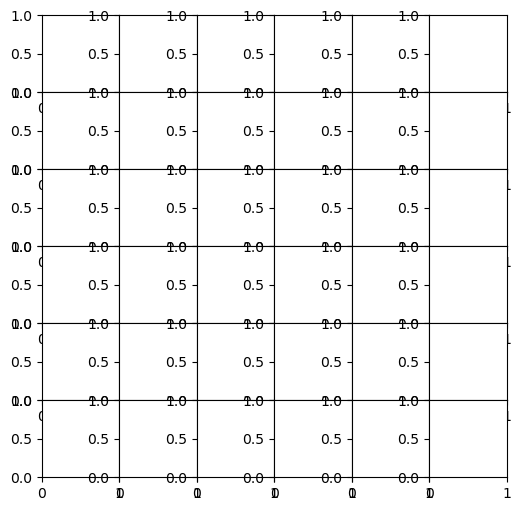

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
#Verificamos cuales columnas son aquellas que contienen renglones vacios
df.isnull().any()
#df.isna().any()

Como primer paso de limpieza del dataframe, vamos a eliminar las 2 columnas que no se consideran relevantes para el estudio:

    X2: Gender (1 = male; 2 = female)
    X4: Marital status (1 = married; 2 = single; 3 = others)

In [ ]:
#Este dataframe, ya no contiene las columnas irrelevantes
df_without_X2_X4 = df.drop(['X2', 'X4',], axis = 1)
df_without_X2_X4.head()

Vamos a renombrar las columnas a sus nombres explicados en el .txt, para entender mejor que numero estamos leyendo durante las siguientes fases

In [ ]:
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X1":"Amount of the given credit"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X3":"Education"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X5":"Age"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X6":"Repayment September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X7":"Repayment August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X8":"Repayment July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X9":"Repayment June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X10":"Repayment May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X11":"Repayment April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X12":"Bill September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X13":"Bill August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X14":"Bill July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X15":"Bill June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X16":"Bill May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X17":"Bill April, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X18":"amount paid  September, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X19":"amount paid  August, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X20":"amount paid  July, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X21":"amount paid  June, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X22":"amount paid  May, 2005"})
df_without_X2_X4 = df_without_X2_X4.rename(columns={"X23":"amount paid  April, 2005"})
df_without_X2_X4

Seleccionando la mejor técnicas para manejar los datos faltantes

Como segundo paso de limpieza, vamos a eliminar renglones con datos vacios, como el ejemplo arriba mostrado donde el ID 19, no contenia datos en las columnas X12-X17.
Una vez que eliminemos esos renglones, veremos que tanto se reduce nuestro dataframe, para asi tomar una decision de que técnica para manejo de datos faltantes utilizaremos.

In [ ]:
#Dropping rows with NaN values on some column (at least 1)
df_no_empty_rows = df_without_X2_X4.dropna()
df_no_empty_rows

#OPCIONAL En caso de querer definir un threshold
#df_no_empty_rows_with_threshold.dropna(thresh=4, inplace = True) # In a row, it needs at least 4 nan values is needed, to maintain in df
#df_no_empty_rows_with_threshold # in case of column  add   axis=1 

In [ ]:
#We see that instead of 3000 rows (original dataframe) we only have now 29,958 rows on this new dataframe
#Este dataframe elimina el renglon completo si es que alguna de las variables (X) es nula
# Solamente 42 de 3000 renglones (1.4%) se pierden al utilizar la técnica de Eliminación por lista.
df_no_empty_rows.shape


# Este sera nuestro dataframe para el ejercicio de la Semana 4:

In [ ]:
df_eliminacion_por_lista = df_no_empty_rows
#df_eliminacion_por_lista.index.name = None
df_eliminacion_por_lista

!!!!!!!!!!!!!!!!!!!!!!!!!! Primero que nada, debemos de normalizar todos nuestros datos de variables INDEPENDIENTES  !!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
# Using Sklearn & MinMax Scalar.
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_normalized = df_eliminacion_por_lista.copy()

#La variable dependiente no se debe de considerar en el dataset de PCA
df_normalized.drop(columns='Y',inplace=True)

df_normalized.iloc[:,0:] = scaler.fit_transform(df_normalized.iloc[:,0:].to_numpy())
df_normalized

# Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
df_normalized.shape

For each clientID, the data include 21 numerical variables, and we are interested in reducing this dimension.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

pcs = PCA()
pcs.fit(df_normalized)
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df = pcsSummary_df.round(4)
pd.set_option('display.max_columns', None)
pcsSummary_df

In [ ]:
#To display how much components do we need to explain more than 90% of variance

#12 Principal components are needed
pcsSummary_df.iloc[2,10]

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


CONCLUSION:
Necesitamos al menos 11 componentes para explicar mas del 90% de la varianza de la coleccion de datos.

# Paso 2: Interprete cada componente principal en términos de las variables originales

Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df_normalized.columns
                                )
pcsComponents_df.iloc[:,:11].head()
#pcsComponents_df.sort_values(by='PC2', inplace=False, ascending=False)

Ahora debemos de buscar la magnitud y direccion de las variables originales, es decir cual influye mas y cual influye menos, en cada uno de los componentes principales

In [ ]:
PC1 = pcsComponents_df['PC1'].abs().idxmax()                  
print('El valor original mas relevante para PC1 es: ', PC1, ", con un peso de: ", pcsComponents_df.abs().loc[PC1,['PC1']].values)
PC2 = pcsComponents_df['PC2'].abs().idxmax()                  
print('El valor original mas relevante para PC2 es: ', PC2, ", con un peso de: ", pcsComponents_df.abs().loc[PC2,['PC2']].values)
PC3 = pcsComponents_df['PC3'].abs().idxmax()                  
print('El valor original mas relevante para PC3 es: ', PC3, ", con un peso de: ", pcsComponents_df.abs().loc[PC3,['PC3']].values)
PC4 = pcsComponents_df['PC4'].abs().idxmax()                  
print('El valor original mas relevante para PC4 es: ', PC4, ", con un peso de: ", pcsComponents_df.abs().loc[PC4,['PC4']].values)
PC5 = pcsComponents_df['PC5'].abs().idxmax()                  
print('El valor original mas relevante para PC5 es: ', PC5, ", con un peso de: ", pcsComponents_df.abs().loc[PC5,['PC5']].values)
PC6 = pcsComponents_df['PC6'].abs().idxmax()                  
print('El valor original mas relevante para PC6 es: ', PC6, ", con un peso de: ", pcsComponents_df.abs().loc[PC6,['PC6']].values)
PC7 = pcsComponents_df['PC7'].abs().idxmax()                  
print('El valor original mas relevante para PC7 es: ', PC7, ", con un peso de: ", pcsComponents_df.abs().loc[PC7,['PC7']].values)
PC8 = pcsComponents_df['PC8'].abs().idxmax()                  
print('El valor original mas relevante para PC8 es: ', PC8, ", con un peso de: ", pcsComponents_df.abs().loc[PC8,['PC8']].values)
PC9 = pcsComponents_df['PC9'].abs().idxmax()                  
print('El valor original mas relevante para PC9 es: ', PC9, ", con un peso de: ", pcsComponents_df.abs().loc[PC9,['PC9']].values)
PC10 = pcsComponents_df['PC10'].abs().idxmax()                  
print('El valor original mas relevante para PC10 es: ', PC10, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC10']].values)
PC11 = pcsComponents_df['PC11'].abs().idxmax()                  
print('El valor original mas relevante para PC11 es: ', PC11, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC11']].values)


In [ ]:
PC1 = pcsComponents_df['PC1'].abs().idxmin()                  
print('El valor original menos relevante para PC1 es: ', PC1, ", con un peso de: ", pcsComponents_df.abs().loc[PC1,['PC1']].values)
PC2 = pcsComponents_df['PC2'].abs().idxmin()                  
print('El valor original menos relevante para PC2 es: ', PC2, ", con un peso de: ", pcsComponents_df.abs().loc[PC2,['PC2']].values)
PC3 = pcsComponents_df['PC3'].abs().idxmin()                  
print('El valor original menos relevante para PC3 es: ', PC3, ", con un peso de: ", pcsComponents_df.abs().loc[PC3,['PC3']].values)
PC4 = pcsComponents_df['PC4'].abs().idxmin()                  
print('El valor original menos relevante para PC4 es: ', PC4, ", con un peso de: ", pcsComponents_df.abs().loc[PC4,['PC4']].values)
PC5 = pcsComponents_df['PC5'].abs().idxmin()                  
print('El valor original menos relevante para PC5 es: ', PC5, ", con un peso de: ", pcsComponents_df.abs().loc[PC5,['PC5']].values)
PC6 = pcsComponents_df['PC6'].abs().idxmin()                  
print('El valor original menos relevante para PC6 es: ', PC6, ", con un peso de: ", pcsComponents_df.abs().loc[PC6,['PC6']].values)
PC7 = pcsComponents_df['PC7'].abs().idxmin()                  
print('El valor original menos relevante para PC7 es: ', PC7, ", con un peso de: ", pcsComponents_df.abs().loc[PC7,['PC7']].values)
PC8 = pcsComponents_df['PC8'].abs().idxmin()                  
print('El valor original menos relevante para PC8 es: ', PC8, ", con un peso de: ", pcsComponents_df.abs().loc[PC8,['PC8']].values)
PC9 = pcsComponents_df['PC9'].abs().idxmin()                  
print('El valor original menos relevante para PC9 es: ', PC9, ", con un peso de: ", pcsComponents_df.abs().loc[PC9,['PC9']].values)
PC10 = pcsComponents_df['PC10'].abs().idxmin()                  
print('El valor original menos relevante para PC10 es: ', PC10, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC10']].values)
PC11 = pcsComponents_df['PC11'].abs().idxmin()                  
print('El valor original menos relevante para PC11 es: ', PC11, ", con un peso de: ", pcsComponents_df.abs().loc[PC10,['PC11']].values)


Paso 3: Identifique valores atípicos

Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
pcsComponents_df.abs().boxplot(rot=45, fontsize=15,figsize=(15,8))

#    Parte 2.  Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

¿Cuál es el número de componentes mínimo y por qué?

    Se necesitan al menos 11 componentes para explicar mas del 90% de la varianza del dataset, por ende 11 seria el numero minimo de componetes a utilizar para crear algun modelo. No hay una regla escrita de cuanto % de varianza se debe de explicar para seleccionar el numero de componentes minimo, sin embargo casi siempre se escoge el 90% como regla de dedo.

¿Cuál es la variación de los datos que representan esos componentes?
    
    El 90.84% de varianza es explicada con 11 componentes.

¿Cuál es la pérdida de información después de realizar PCA?

    Al utilizar 11 componentes, se perderia 100 - 90.84 = 9.16% de la información.

De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

    Los siguientes valores se obtuvieron CONSIDERANDO los valores atipicos (outliers), no hay evidencia suficiente que muestre que estos datos sean tratados como BIAS, por ende decidimos considerarlos.

    El valor original mas relevante para PC1 es:  Bill June, 2005 , con un peso de:  [0.35404466]
    El valor original mas relevante para PC2 es:  Repayment June, 2005 , con un peso de:  [0.34520086]
    El valor original mas relevante para PC3 es:  amount paid  August, 2005 , con un peso de:  [0.42994087]
    El valor original mas relevante para PC4 es:  Education , con un peso de:  [0.70367197]
    El valor original mas relevante para PC5 es:  amount paid  May, 2005 , con un peso de:  [0.56117246]
    El valor original mas relevante para PC6 es:  amount paid  June, 2005 , con un peso de:  [0.6659325]
    El valor original mas relevante para PC7 es:  amount paid  May, 2005 , con un peso de:  [0.70213931]
    El valor original mas relevante para PC8 es:  amount paid  April, 2005 , con un peso de:  [0.51483408]
    El valor original mas relevante para PC9 es:  amount paid  July, 2005 , con un peso de:  [0.78604804]
    El valor original mas relevante para PC10 es:  amount paid  September, 2005 , con un peso de:  [0.72908721]
    El valor original mas relevante para PC11 es:  Repayment September, 2005 , con un peso de:  [0.10160137]
    

    El valor original menos relevante para PC1 es:  Age , con un peso de:  [0.01351372]
    El valor original menos relevante para PC2 es:  Age , con un peso de:  [0.06185642]
    El valor original menos relevante para PC3 es:  Repayment September, 2005 , con un peso de:  [0.00160321]
    El valor original menos relevante para PC4 es:  Bill July, 2005 , con un peso de:  [0.00240161]
    El valor original menos relevante para PC5 es:  Repayment April, 2005 , con un peso de:  [0.00254917]
    El valor original menos relevante para PC6 es:  Repayment August, 2005 , con un peso de:  [0.00018953]
    El valor original menos relevante para PC7 es:  Bill September, 2005 , con un peso de:  [0.00270433]
    El valor original menos relevante para PC8 es:  Repayment July, 2005 , con un peso de:  [0.00988628]
    El valor original menos relevante para PC9 es:  Bill May, 2005 , con un peso de:  [0.00356531]
    El valor original menos relevante para PC10 es:  Education , con un peso de:  [0.00107573]
    El valor original menos relevante para PC11 es:  Bill July, 2005 , con un peso de:  [0.19300396]

¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

